In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import acquire
import prepare
from sklearn.model_selection import train_test_split
from scipy import stats

In [2]:
# Acquire, prepare & split your data.

# Univariate Stats

# For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

# For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

# Document takeaways & any actions.

# Bivariate Stats

# Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal 
# line showing the overall mean of the metric (y-axis).

# For each measurement type, compute the descriptive statistics for each species.

# For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) 
# to see if there is a significant difference between the two groups. Do the same for the other measurement types.

# Document takeaways & any actions.

In [2]:
iris_db = prepare.prep_iris(acquire.get_iris_db())
iris_db.head()

this file exists, reading from csv file


,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [4]:
iris_db.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species       150 non-null    object 
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris_db.nunique()

species          3
sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
dtype: int64

In [7]:
iris_db.columns

Index(['species', 'sepal_length', 'sepal_width', 'petal_length',
       'petal_width'],
      dtype='object')

In [4]:
category_columns = [] # List of categorical 
continous_columns = [] # List of continuous
for col in iris_db.columns:
    print(col)
    print(iris_db[col].dtype)
    if iris_db[col].dtype == 'object':
        print('it is categorical')
        category_columns.append(col)
        print(f' There are continuous columns {continous_columns}')
    else: 
        print('this is a number type')
        continous_columns.append(col)   
    print()
    print(f' There are continuous columns {continous_columns}')
    print()
    print(f' These are categrory columns {category_columns}')

species
object
it is categorical
 There are continuous columns []

 There are continuous columns []

 These are categrory columns ['species']
sepal_length
float64
this is a number type

 There are continuous columns ['sepal_length']

 These are categrory columns ['species']
sepal_width
float64
this is a number type

 There are continuous columns ['sepal_length', 'sepal_width']

 These are categrory columns ['species']
petal_length
float64
this is a number type

 There are continuous columns ['sepal_length', 'sepal_width', 'petal_length']

 These are categrory columns ['species']
petal_width
float64
this is a number type

 There are continuous columns ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

 These are categrory columns ['species']


In [5]:
category_columns

['species']

species   
setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


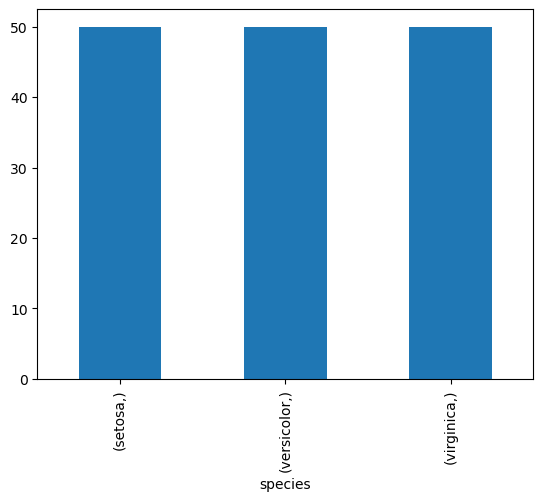

In [6]:
for col in category_columns:
    # print(iris_db[category_columns].value_counts())
    # print(iris_db[category_columns].value_counts().sort_index())
    print(iris_db[category_columns].value_counts(normalize=True))
    print(iris_db[category_columns].value_counts().sort_index().plot.bar())
    plt.show()    

In [7]:
continous_columns

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

sepal_length
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


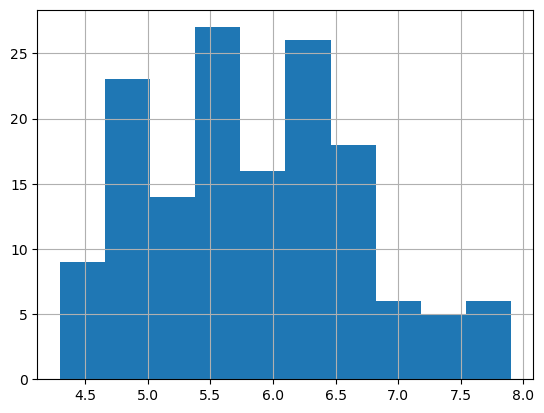

sepal_width
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


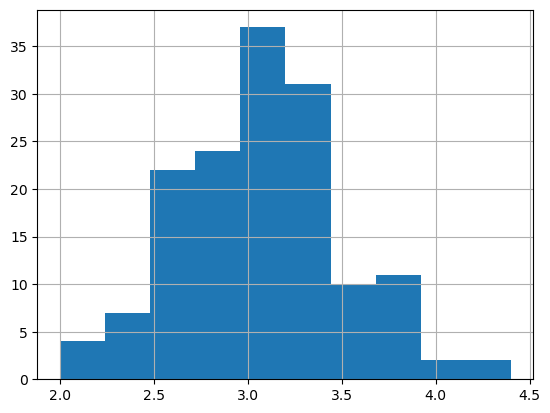

petal_length
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


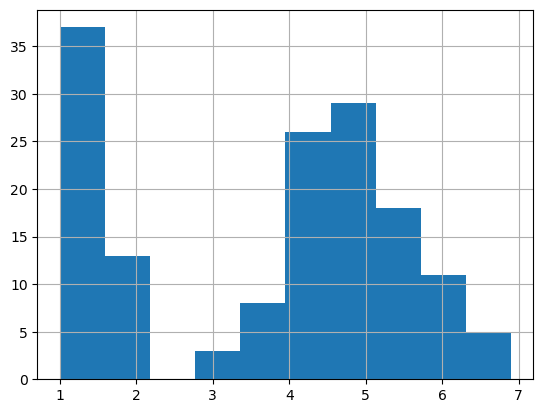

petal_width
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


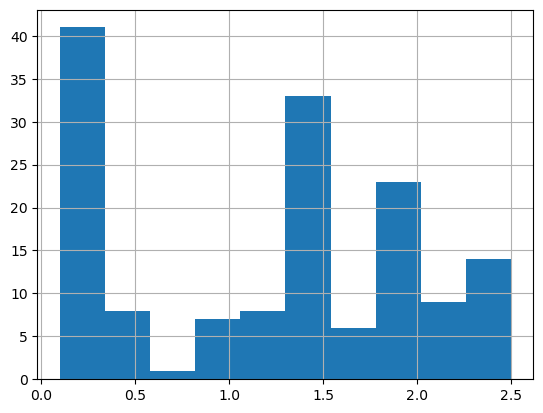

In [8]:
for col in continous_columns:
    print(col)
    # print(iris_db[continous_columns].value_counts())
    print(iris_db[continous_columns].describe())
    iris_db[col].hist()
    plt.show()

In [13]:
train_iris, validate_iris, test_iris = prepare.splitting_data(iris_db, 'species')

In [14]:
train_iris.shape

(90, 5)

In [15]:
train_iris.head()

,species,sepal_length,sepal_width,petal_length,petal_width
24,setosa,4.8,3.4,1.9,0.2
147,virginica,6.5,3.0,5.2,2.0
88,versicolor,5.6,3.0,4.1,1.3
123,virginica,6.3,2.7,4.9,1.8
31,setosa,5.4,3.4,1.5,0.4


In [16]:
validate_iris.shape

(30, 5)

In [17]:
test_iris.shape

(30, 5)

> 1. Hypothesize

> Question: Does sepal_length affect whether or not the species

In [18]:
train_iris.sepal_length.value_counts().head()

sepal_length
5.7    8
5.1    6
5.0    6
6.3    5
5.4    5
Name: count, dtype: int64

In [19]:
train_iris.species.value_counts().head()

species
setosa        30
virginica     30
versicolor    30
Name: count, dtype: int64

> 2. Visualize

<Axes: xlabel='species', ylabel='sepal_length'>

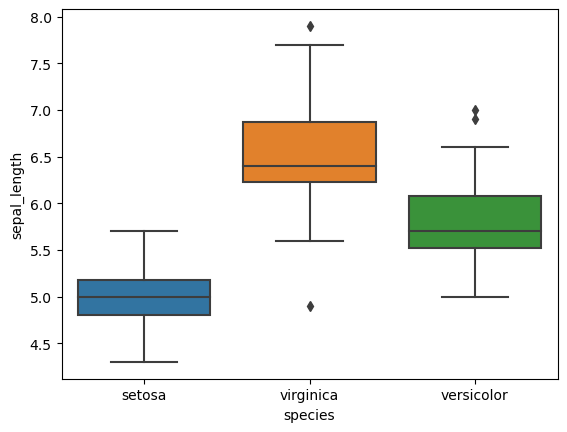

In [20]:
sns.boxplot(data=train_iris, x='species', y='sepal_length')

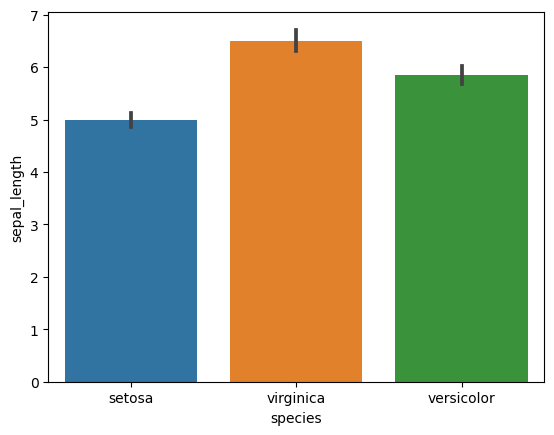

In [21]:
sns.barplot(data=train_iris, x='species', y='sepal_length');

> We can see certain species is related to how sepal length can be

> 3. Analyze (with Statistics)

$H_0$: There is NO relationship between sepal_length and species

$H_a$: There IS a relationship between sepal_length and species

alpha = 0.05

In [22]:
train_iris.species.value_counts()

species
setosa        30
virginica     30
versicolor    30
Name: count, dtype: int64

In [23]:
setosa_species = train_iris [train_iris.species == 'setosa'].sepal_length

In [24]:
setosa_species.head()

24    4.8
31    5.4
11    4.8
35    5.0
7     5.0
Name: sepal_length, dtype: float64

In [25]:
virginica_species = train_iris [train_iris.species == 'virginica'].sepal_length

In [26]:
virginica_species.head()

147    6.5
123    6.3
137    6.4
133    6.3
103    6.3
Name: sepal_length, dtype: float64

In [27]:
versicolor_species = train_iris [train_iris.species == 'versicolor'].sepal_length

In [28]:
versicolor_species.head()

88    5.6
54    6.5
97    6.2
89    5.5
50    7.0
Name: sepal_length, dtype: float64

In [29]:
test_iris.head()

,species,sepal_length,sepal_width,petal_length,petal_width
22,setosa,4.6,3.6,1.0,0.2
25,setosa,5.0,3.0,1.6,0.2
86,versicolor,6.7,3.1,4.7,1.5
34,setosa,4.9,3.1,1.5,0.2
76,versicolor,6.8,2.8,4.8,1.4


In [30]:
pd.crosstab(train_iris.species, train_iris.sepal_length)

sepal_length,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,...,6.6,6.7,6.8,6.9,7.0,7.1,7.2,7.3,7.7,7.9
species,,,,,,,,,,,,,,,,,,,,,
setosa,1,1,1,3,1,4,1,5,5,1,...,0,0,0,0,0,0,0,0,0,0
versicolor,0,0,0,0,0,0,0,1,1,1,...,1,0,0,1,1,0,0,0,0,0
virginica,0,0,0,0,0,0,1,0,0,0,...,0,4,1,3,0,1,1,1,1,1


In [31]:
stats.ttest_ind(test_iris.sepal_length, setosa_species)

TtestResult(statistic=5.045112826047759, pvalue=4.7706114443206495e-06, df=58.0)

In [32]:
# The pvalue is less than alpha, we reject the the null hypothesis
# There is a relationship between species and sepal_length

In [33]:
stats.mannwhitneyu(virginica_species, versicolor_species)

MannwhitneyuResult(statistic=738.0, pvalue=2.0617069812153646e-05)

In [34]:
# The pvalue is less than alpha, we reject the the null hypothesis
# There is a relationship between species and sepal_length

> 4. Summarize 

> Sepal length can be determine in what kind of species

> Multivariate Stats

> 1. Hypothesize

> Does certain species tend to have wider sepal?

In [35]:
train_iris.head()

,species,sepal_length,sepal_width,petal_length,petal_width
24,setosa,4.8,3.4,1.9,0.2
147,virginica,6.5,3.0,5.2,2.0
88,versicolor,5.6,3.0,4.1,1.3
123,virginica,6.3,2.7,4.9,1.8
31,setosa,5.4,3.4,1.5,0.4


> 2. Visualize 

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


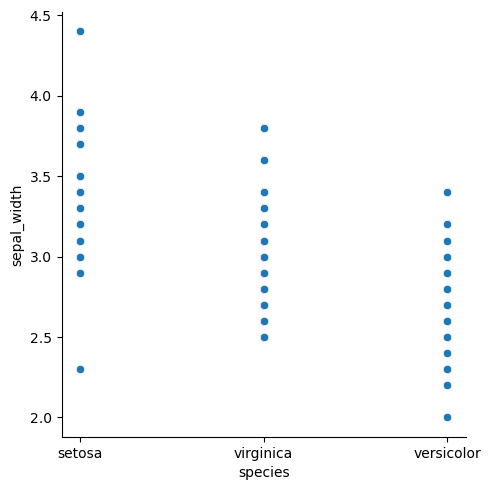

In [36]:
sns.relplot(data=train_iris, x='species', y='sepal_width');

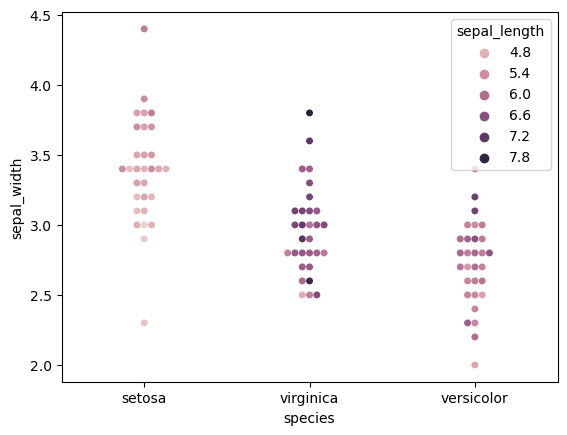

In [37]:
sns.swarmplot(data=train_iris, y='sepal_width', x='species', hue='sepal_length');

> 3. Summarize

> The sepal width tend to be different when it comes the virginica and setosa

In [ ]:
# Part III

# Explore your telco data to discover drivers of churn
# Determine if certain columns should be dropped
# Determine if it would be valuable to bin some numeric columns
# Determine if it would be valuable to combine multiple columns into one.
# What are your drivers of churn?

# Does it make sense to combine any features?

# Do you find any surprises?

# Document any and all findings and takeaways in your notebook using markdown.

In [9]:
telco_db = prepare.prep_telco(acquire.get_telco_db())
telco_db.head()

this file exists, reading from csv file


,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [10]:
telco_db.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type'],
      dtype='object')

In [11]:
telco_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   gender                 7043 non-null   object 
 2   senior_citizen         7043 non-null   int64  
 3   partner                7043 non-null   object 
 4   dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   phone_service          7043 non-null   object 
 7   multiple_lines         7043 non-null   object 
 8   online_security        7043 non-null   object 
 9   online_backup          7043 non-null   object 
 10  device_protection      7043 non-null   object 
 11  tech_support           7043 non-null   object 
 12  streaming_tv           7043 non-null   object 
 13  streaming_movies       7043 non-null   object 
 14  paperless_billing      7043 non-null   object 
 15  mont

In [17]:
telco_db.total_charges = telco_db.total_charges.astype(float)

In [18]:
cat_column = [] # List of categorical
con_column = [] # List of continuous

for col in telco_db.columns:
    print(col)
    print(telco_db[col].dtypes)
    if telco_db[col].dtypes == 'object':
        print('this will be object type')
        cat_column.append(col)
    else:
        print('this will be a number type')
        
        # check for how many unique values
        if telco_db[col].nunique() < 5:
            print('treat as categorical variable')
            cat_column.append(col)
        else:
            con_column.append(col)
    print()
    

customer_id
object
this will be object type

gender
object
this will be object type

senior_citizen
int64
this will be a number type
treat as categorical variable

partner
object
this will be object type

dependents
object
this will be object type

tenure
int64
this will be a number type

phone_service
object
this will be object type

multiple_lines
object
this will be object type

online_security
object
this will be object type

online_backup
object
this will be object type

device_protection
object
this will be object type

tech_support
object
this will be object type

streaming_tv
object
this will be object type

streaming_movies
object
this will be object type

paperless_billing
object
this will be object type

monthly_charges
float64
this will be a number type

total_charges
float64
this will be a number type

churn
object
this will be object type

contract_type
object
this will be object type

internet_service_type
object
this will be object type

payment_type
object
this will be

In [13]:
cat_column

['customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [19]:
con_column

['tenure', 'monthly_charges', 'total_charges']

In [47]:
telco_db[cat_column].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   customer_id            7043 non-null   object
 1   gender                 7043 non-null   object
 2   senior_citizen         7043 non-null   int64 
 3   partner                7043 non-null   object
 4   dependents             7043 non-null   object
 5   phone_service          7043 non-null   object
 6   multiple_lines         7043 non-null   object
 7   online_security        7043 non-null   object
 8   online_backup          7043 non-null   object
 9   device_protection      7043 non-null   object
 10  tech_support           7043 non-null   object
 11  streaming_tv           7043 non-null   object
 12  streaming_movies       7043 non-null   object
 13  paperless_billing      7043 non-null   object
 14  total_charges          7043 non-null   object
 15  churn                

Axes(0.125,0.11;0.775x0.77)


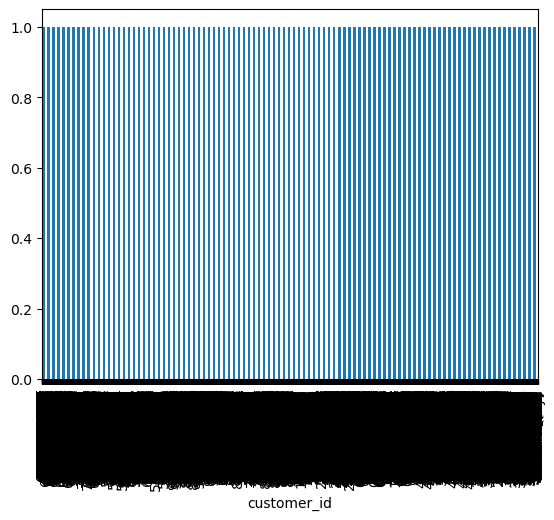


Axes(0.125,0.11;0.775x0.77)


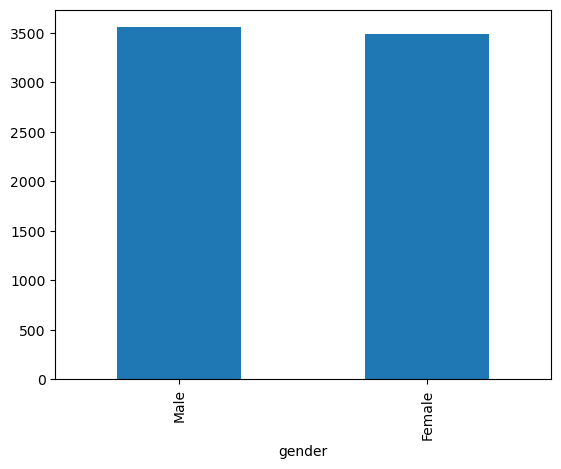


Axes(0.125,0.11;0.775x0.77)


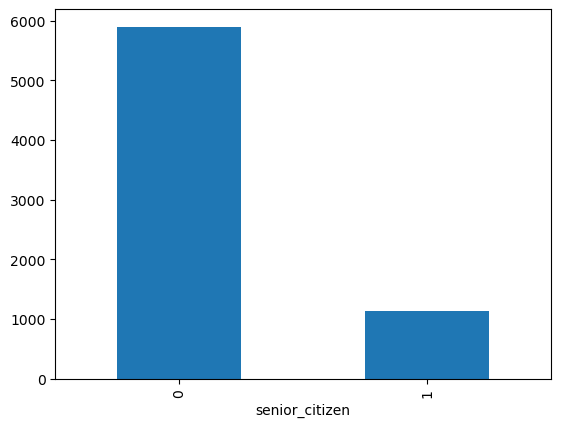


Axes(0.125,0.11;0.775x0.77)


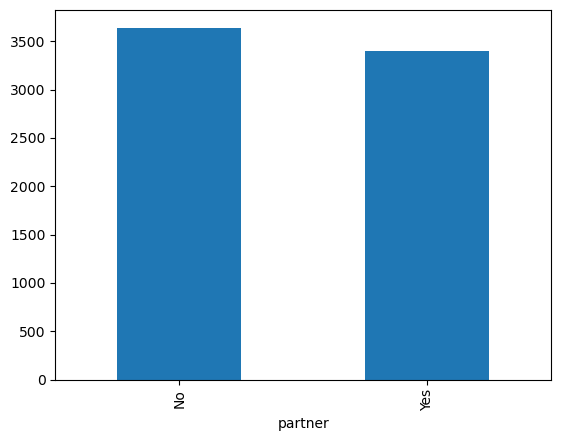


Axes(0.125,0.11;0.775x0.77)


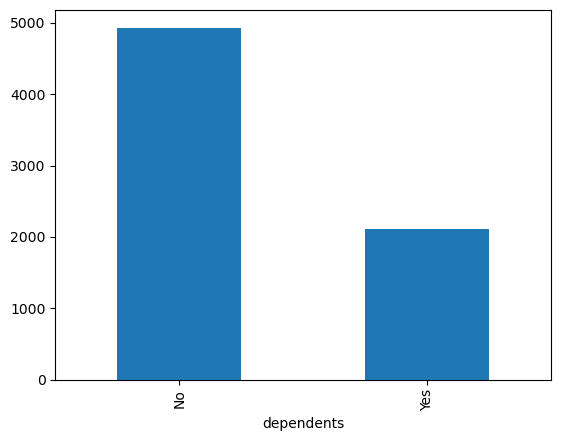


Axes(0.125,0.11;0.775x0.77)


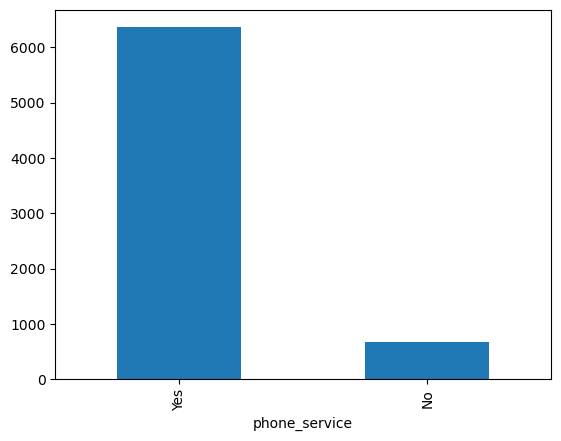


Axes(0.125,0.11;0.775x0.77)


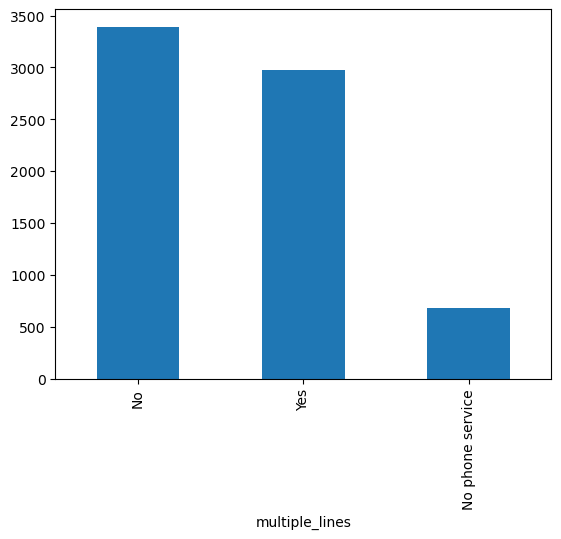


Axes(0.125,0.11;0.775x0.77)


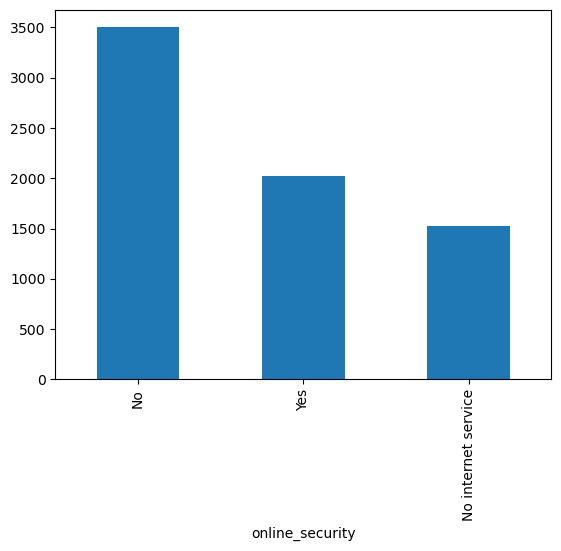


Axes(0.125,0.11;0.775x0.77)


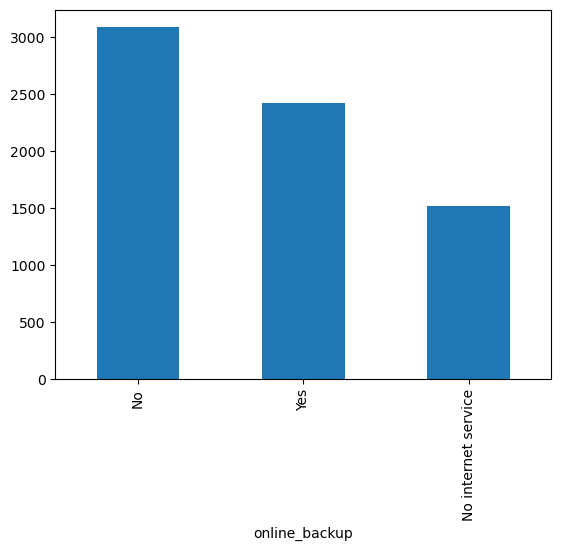


Axes(0.125,0.11;0.775x0.77)


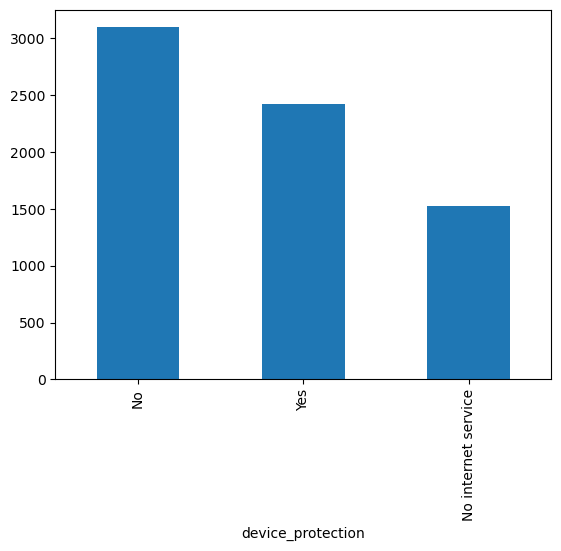


Axes(0.125,0.11;0.775x0.77)


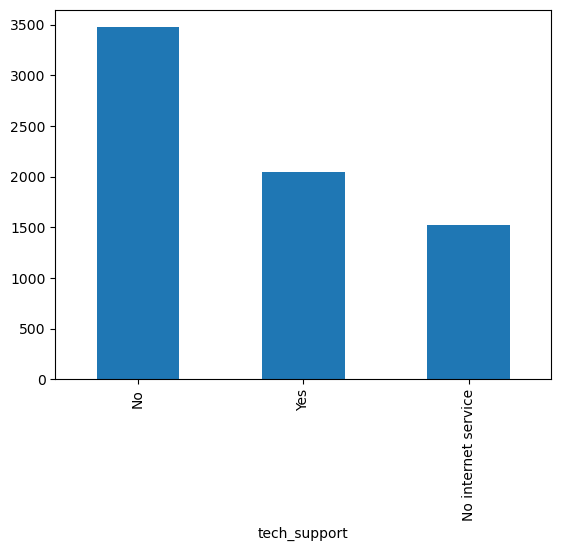


Axes(0.125,0.11;0.775x0.77)


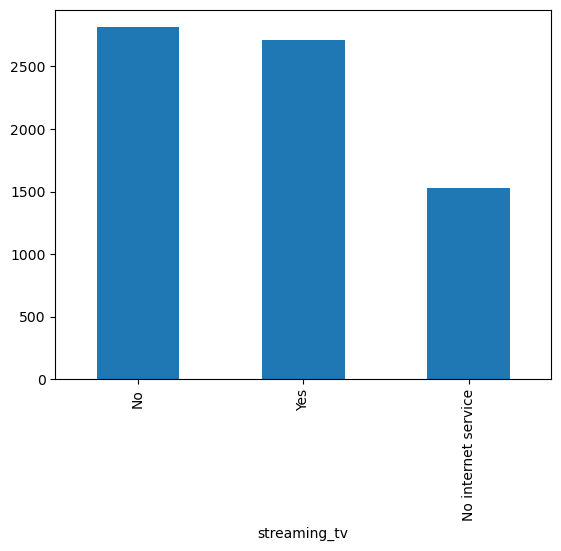


Axes(0.125,0.11;0.775x0.77)


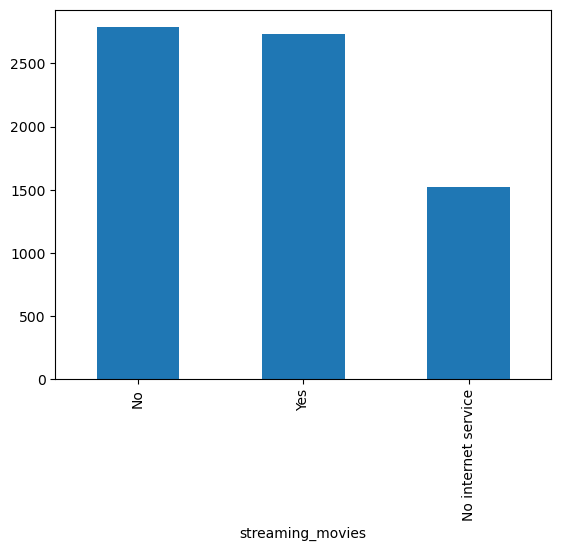


Axes(0.125,0.11;0.775x0.77)


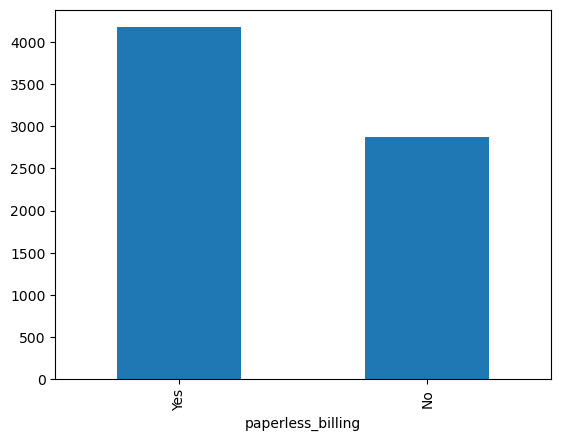


Axes(0.125,0.11;0.775x0.77)


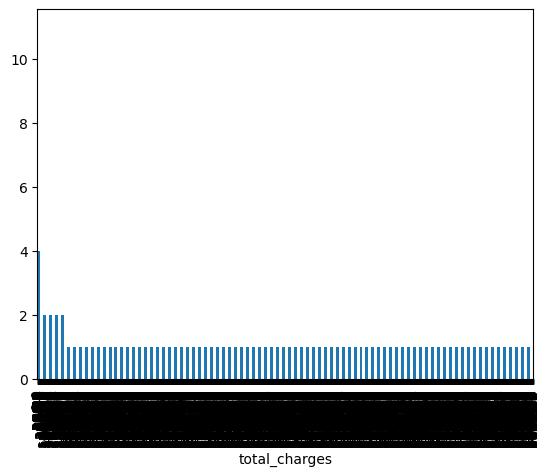


Axes(0.125,0.11;0.775x0.77)


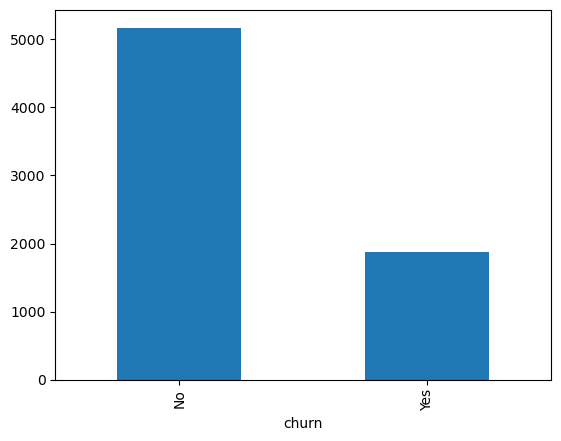


Axes(0.125,0.11;0.775x0.77)


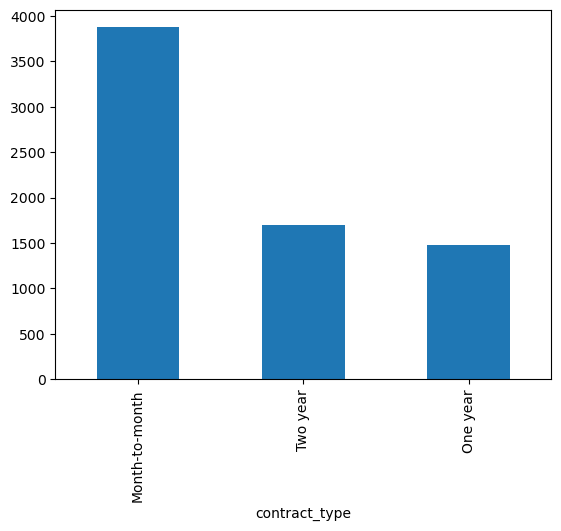


Axes(0.125,0.11;0.775x0.77)


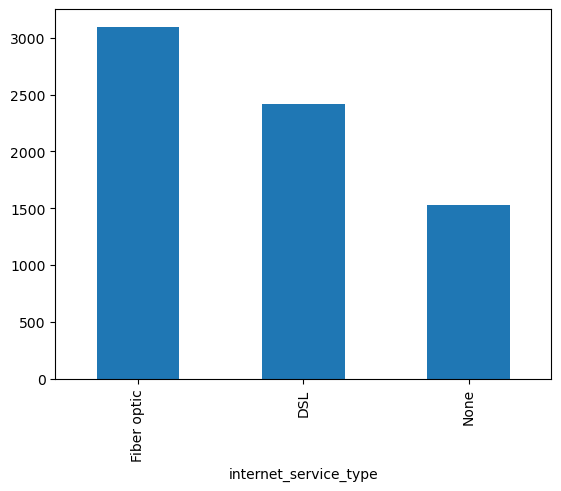


Axes(0.125,0.11;0.775x0.77)


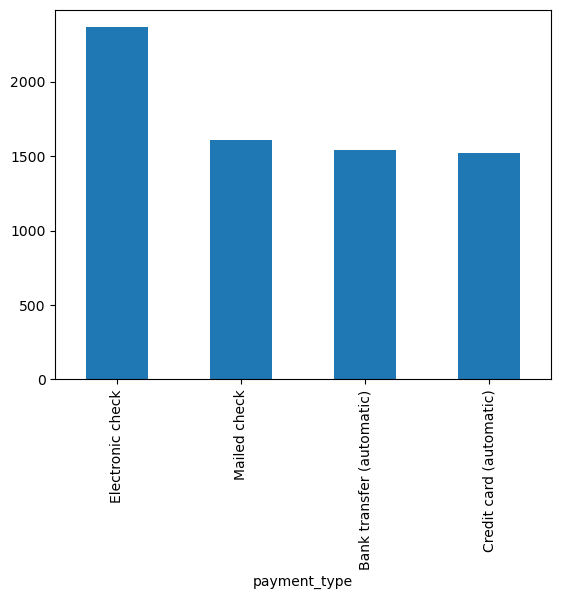

In [101]:
for col in cat_column:
    # print(telco_db[col].value_counts(normalize=True))
    print(telco_db[col].value_counts().plot.bar())
    plt.show()
    print()

In [22]:
train_telco, validate_telco, test_telco = prepare.splitting_data(telco_db, 'churn')
train_telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
2865,4083-BFNYK,Female,1,Yes,No,38,Yes,Yes,Yes,Yes,...,No,No,Yes,No,95.00,3591.25,No,One year,Fiber optic,Credit card (automatic)
4107,5804-LEPIM,Female,1,No,No,2,Yes,No,No,No,...,No,No,No,Yes,70.35,139.05,Yes,Month-to-month,Fiber optic,Electronic check
3453,4895-TMWIR,Male,1,Yes,No,11,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,No,19.95,214.75,Yes,Month-to-month,None,Mailed check
923,1342-JPNKI,Male,0,No,No,10,Yes,Yes,No,No,...,No,Yes,No,Yes,86.05,834.10,Yes,Month-to-month,Fiber optic,Bank transfer (automatic)
2370,3397-AVTKU,Male,0,No,No,43,Yes,No,No,Yes,...,No,No,Yes,Yes,60.00,2548.55,No,Two year,DSL,Electronic check


In [ ]:
# Explore your telco data to discover drivers of churn
# Determine if certain columns should be dropped
# Determine if it would be valuable to bin some numeric columns
# Determine if it would be valuable to combine multiple columns into one.
# What are your drivers of churn?

# Does it make sense to combine any features?

# Do you find any surprises?

# Document any and all findings and takeaways in your notebook using markdown.

> 1. Hypothesize

> Question: Does customers churn when seeing their monthly charges in correlation with their contract type?

> monthly_charges: categorical

> churn: categorical

> contract_type: categorical

> 2. Visualize

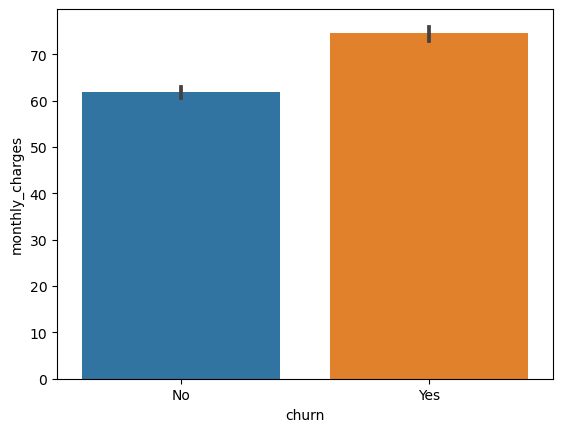

In [38]:
sns.barplot(data=train_telco, y='monthly_charges', x='churn');

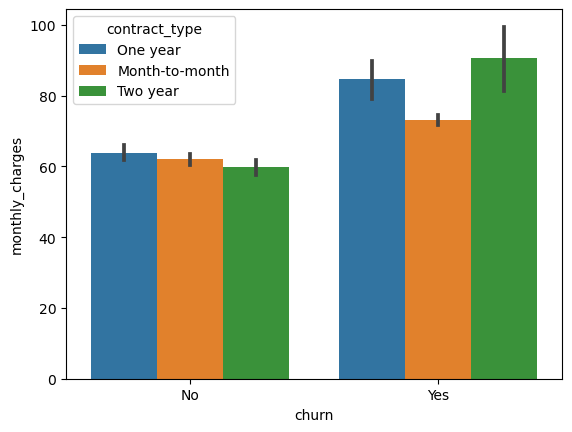

In [40]:
sns.barplot(data=train_telco, y='monthly_charges', x='churn', hue='contract_type');

> 3. Summarize

> Customers tends to leave when monthly charges are higher and after one year and two year contract 

> 1. Hypothesize

> Question: Does customers churn affecting monthly charges if using paperless billing?

> monthly_charges: categorical

> churn: categorical

> paperless_billing: categorical

> 2. Visualize

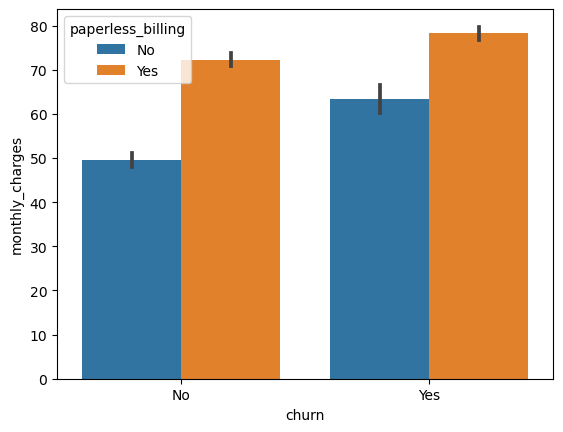

In [72]:
sns.barplot(data=train_telco, y='monthly_charges', x='churn', hue='paperless_billing');

In [64]:
train_telco.total_charges = train_telco.total_charges.astype(float)
train_telco.total_charges

2865    3591.25
4107     139.05
3453     214.75
923      834.10
2370    2548.55
         ...   
1286      70.50
4999    2754.00
6892    8594.40
3718     649.65
5354     886.70
Name: total_charges, Length: 4225, dtype: float64

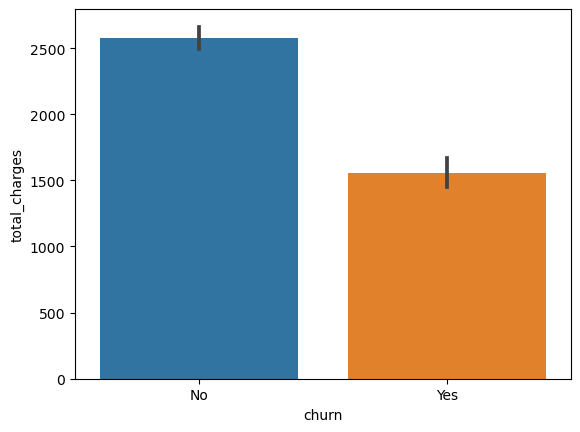

In [24]:
sns.barplot(data=train_telco, y='total_charges', x='churn');

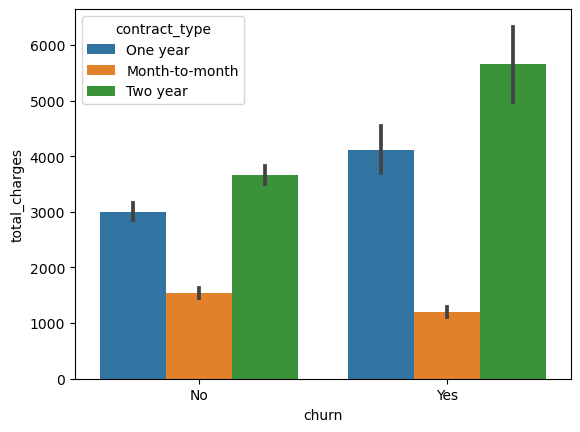

In [26]:
sns.barplot(data=train_telco, y='total_charges', x='churn', hue='contract_type');

> 3. Summarize

> Customers has a higher chance to churn because total charges and contract type